## Observations

##### The correlation coefficient of .84 between mouse weight and average tumor volume for the Capomulin Regimen means that there is a strong, but not perfect, correlation between those variables. The r squared value of .71 tells us that 71% of the variability in the average tumor volume can be explained by the linear relationship with mouse weight.
##### Only one of the four most promising treatments had potential outliers (Infubinol), so the data of the other three treatements is trustworthy but not the data of Infubinol.
##### Ramicane had the smallest tumor volume with the smallest variance and standar deviation. The mean and median were very close for this regimen, so the data for it was close to normal distribution.




## Prepare the Data

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [94]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [95]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = mouse_metadata.merge(study_results, on='Mouse ID')

# Display the data table for preview
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Checking the number of mice.
study_data_complete['Mouse ID'].nunique()

249

In [97]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [98]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the mouse_results DataFrame to only include the duplicate mice
duplicate_mouse_results = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)]

# Sort the DataFrame by Mouse ID and Timepoint
duplicate_mouse_results = duplicate_mouse_results.sort_values(by=['Mouse ID', 'Timepoint'])

# Display the DataFrame
print(duplicate_mouse_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [100]:
# Checking the number of mice in the clean DataFrame.
clean_study_data_complete['Mouse ID'].nunique()

248

## Summary Table

In [101]:
#summary statistics table for each regimen
import numpy as np

#group DataFrame by Regimen
grouped = clean_study_data_complete.groupby('Drug Regimen')

#mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen calculation
mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
std_dev = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_table = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Std Dev': std_dev, 'SEM': sem})

# Print the summary DataFrame
print(summary_table)



                   Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

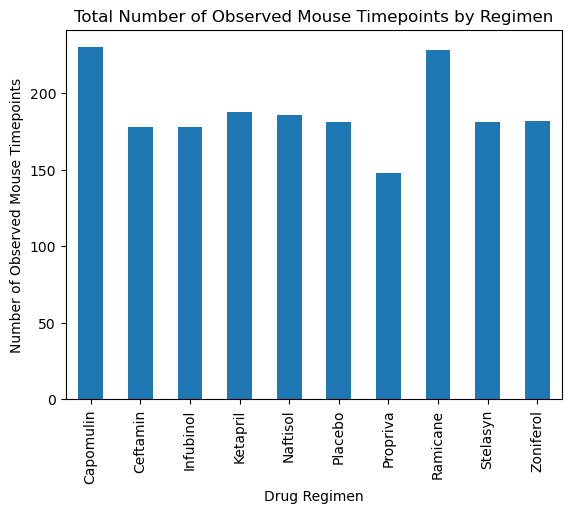

In [102]:
#count number of mouse IDs per Regimen
regimen_count = clean_study_data_complete.groupby('Drug Regimen')['Mouse ID'].count()

#bar chart using Pandas DataFrame.plot() method
regimen_count.plot(kind='bar', title='Total Number of Observed Mouse Timepoints by Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.show()


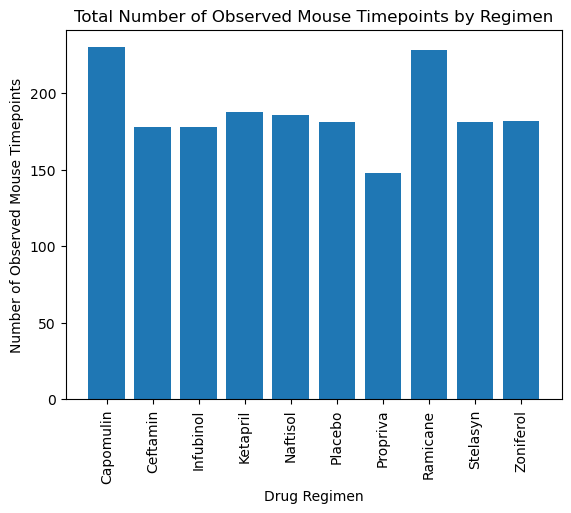

In [103]:
#bar chart using Matplotlib's pyplot methods
labels = regimen_count.index
y_values = regimen_count.values

plt.bar(labels, y_values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Observed Mouse Timepoints by Regimen')
plt.show()


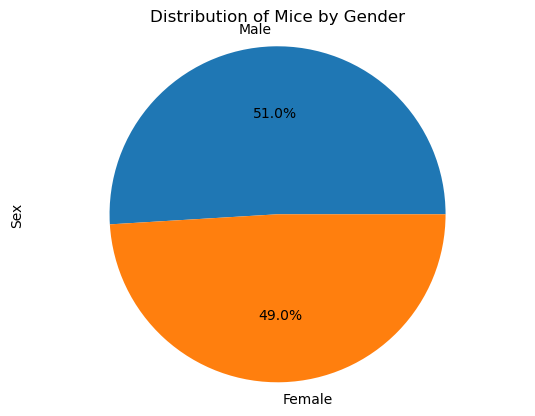

In [104]:
#count number of male and female mice
gender_count = clean_study_data_complete['Sex'].value_counts()

#pie chart using Pandas DataFrame.plot() method
gender_count.plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%', title='Distribution of Mice by Gender')
plt.axis('equal')
plt.show()



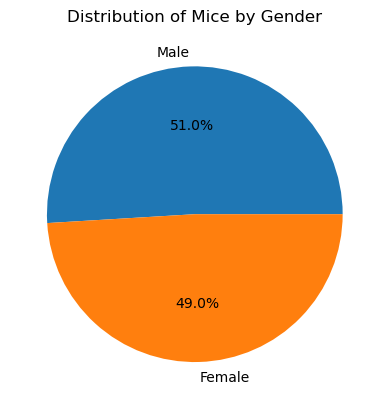

In [105]:
#pie chart using Matplotlib's pyplot methods
labels = gender_count.index
sizes = gender_count.values

plt.pie(sizes, labels=labels,autopct = '%1.1f%%')
plt.title('Distribution of Mice by Gender')
plt.show()

## Calculate Quartiles, Find Outliers, and Create a Box Plot

In [106]:
#grouped DataFrame that shows the last (greatest) time point for each mouse
max_timepoints = clean_study_data_complete.groupby('Mouse ID')['Timepoint'].max()

#grouped DataFrame mreged with the original cleaned DataFrame
merged_results = pd.merge(max_timepoints, clean_study_data_complete, on=['Mouse ID', 'Timepoint'], how='left')

merged_results



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [107]:
#final tumor volume of each mouse across four treatment regimens
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']

tumor_volumes = []

for treatment in treatments:
    volumes = merged_results.loc[merged_results['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(volumes)

#quartiles and IQR for each treatment, and potential outliers
for i, treatment in enumerate(treatments):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    
    print(f"{treatment} potential outliers:")
    if outliers.empty:
        print("no outliers")
    else:
        print(outliers)

Capomulin potential outliers:
no outliers
Ceftamin potential outliers:
no outliers
Infubinol potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane potential outliers:
no outliers


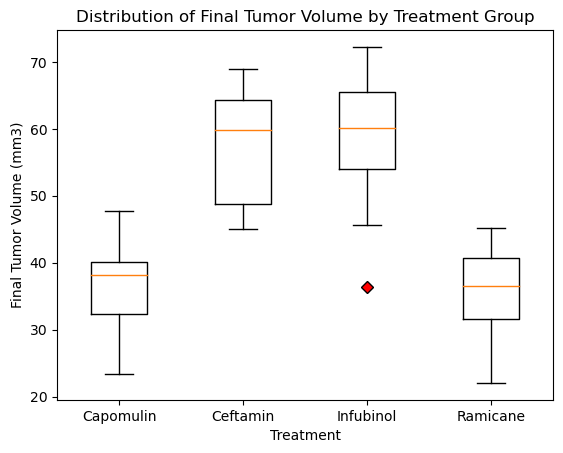

In [108]:
#dictionary to hold the final tumor volumes for each treatment
tumor_volumes = {}
for treatment in treatments:
    volumes = merged_results.loc[merged_results['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes[treatment] = volumes

#list of outlier markers for highlighting potential outliers
outlier_markers = dict(markerfacecolor='red', marker='D')

#box plot showing the distribution of final tumor volume for each treatment
fig, ax = plt.subplots()
ax.boxplot(list(tumor_volumes.values()), labels=list(tumor_volumes.keys()), flierprops=outlier_markers)
ax.set_title('Distribution of Final Tumor Volume by Treatment Group')
ax.set_xlabel('Treatment')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line Plot and a Scatter Plot


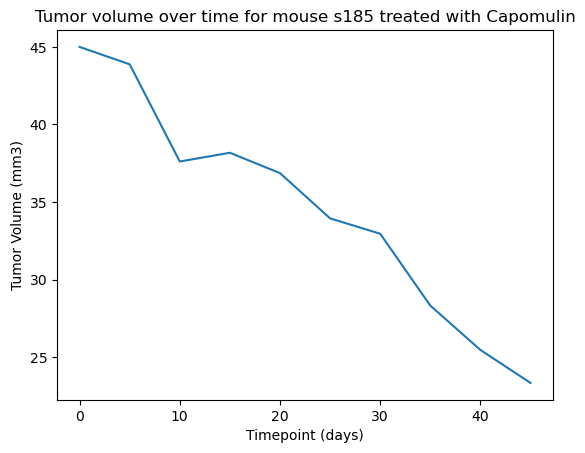

In [109]:
#select one mouse
mouse_id = 's185'
mouse_data = clean_study_data_complete[clean_study_data_complete['Mouse ID'] == mouse_id]

#line plot for that mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Tumor volume over time for mouse {mouse_id} treated with Capomulin")
plt.show()


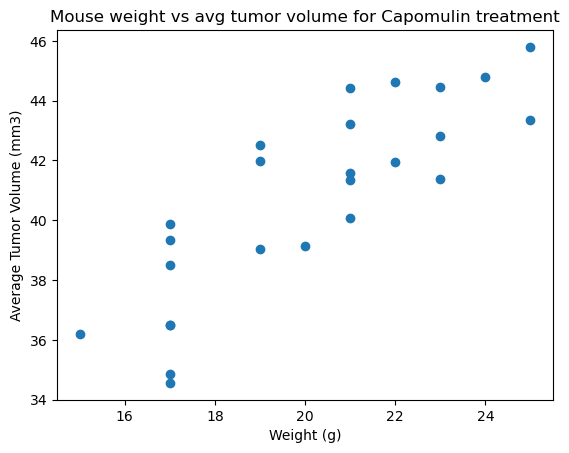

In [110]:
#data for Capomulin-treated mice
capomulin_data = clean_study_data_complete[clean_study_data_complete['Drug Regimen'] == 'Capomulin']

#avg tumor volume and mouse weight for each 
mouse_summary = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

#scatter plot of mouse weight vs avg tumor volume
plt.scatter(mouse_summary['Weight (g)'], mouse_summary['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs avg tumor volume for Capomulin treatment')
plt.show()


## Correlation and Regression


In [111]:
#data of Capomulin
capomulin_df = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
capomulin_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [112]:
#grouped data by Mouse ID and avg tumor volume
capomulin_grouped = capomulin_df.groupby('Mouse ID').mean()
capomulin_grouped

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [113]:
#calculation of correlation coeficient
from scipy.stats import pearsonr

correlation, p_value = pearsonr(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")


The correlation coefficient between mouse weight and average tumor volume is 0.84


In [114]:
#linear regression calculation
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
print(f"The slope of the regression line is {slope:.2f}")
print(f"The intercept of the regression line is {intercept:.2f}")
print(f"The R-squared value of the regression line is {r_value**2:.2f}")


The slope of the regression line is 0.95
The intercept of the regression line is 21.55
The R-squared value of the regression line is 0.71


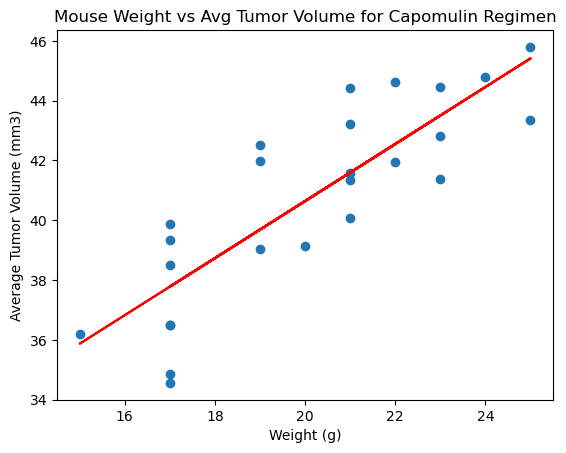

In [115]:
#plot linear regression
x_values = capomulin_grouped['Weight (g)']
y_values = capomulin_grouped['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')
plt.plot(x_values, slope * x_values + intercept, color='red')
plt.show()
